In [28]:
import h5py
import matplotlib.pyplot as plt

Keys in the file: ['archive', 'artiq_version', 'datasets', 'expid', 'rid', 'run_time', 'start_time']
<KeysViewHDF5 ['fit_signal', 'pmt_counts', 'pmt_counts_avg_thresholded', 'time']>


Text(0, 0.5, '<z>')

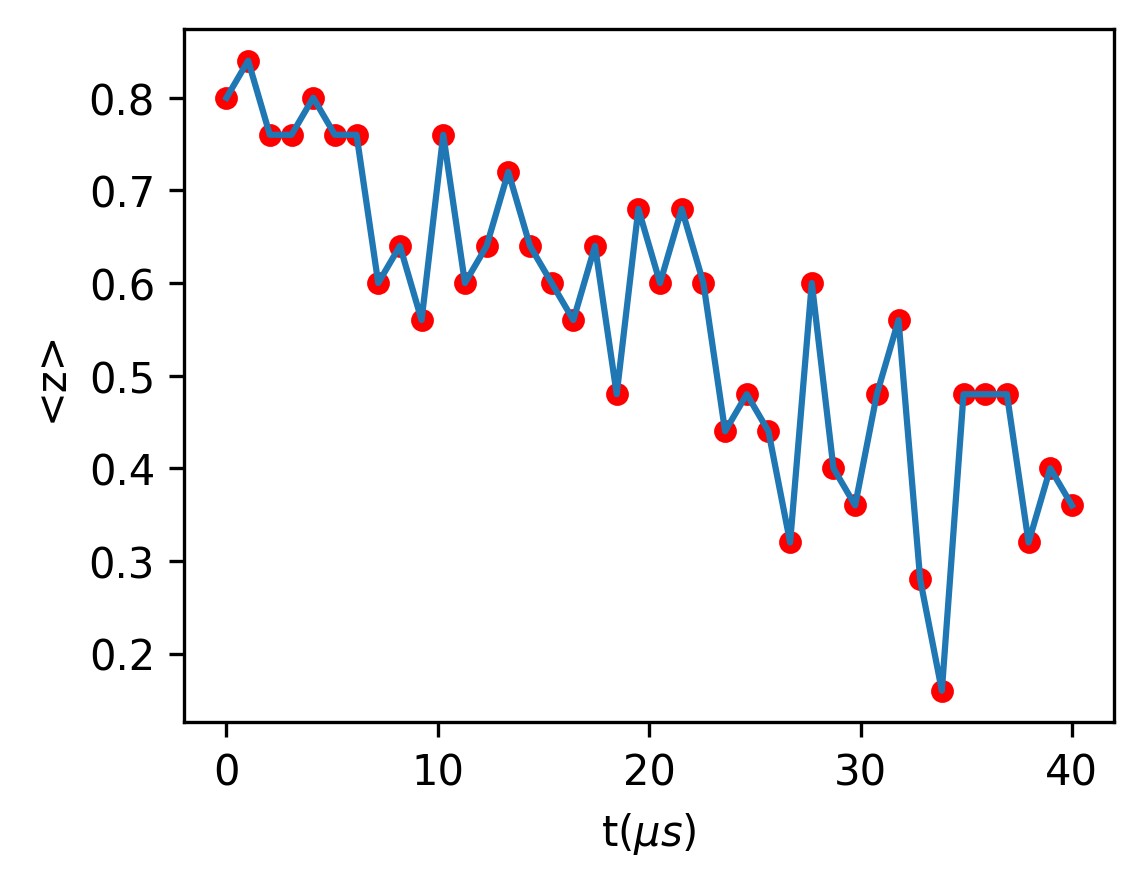

In [29]:
# Path to your .h5 file
file_path = '../results/2024-10-14/15/000026576-TimeScan854.h5'

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Print the names of the groups/datasets in the file
    print("Keys in the file:", list(file.keys()))
    
    # Assuming there's a dataset named 'data' in the file
    # Modify this part according to your file's structure
    data = file['datasets']
    print(data.keys())

    rabi_t= data['time'][:]
    pmt_count=data['pmt_counts_avg_thresholded'][:]

plt.figure(figsize=(4,3),dpi=300)
plt.plot(rabi_t, pmt_count)
plt.scatter(rabi_t, pmt_count,c='red',s=20)
plt.xlabel('${\\rm t}(\mu s)$')
plt.ylabel('<z>')



In [30]:
import numpy as np
from scipy.optimize import curve_fit

# Define the exponential decay function
def exponential_decay(t, A, tau, C):
    return A * np.exp(-t / tau) + C

# Function to fit data and return the lifetime
def fit_exponential_decay(t, y_data):
    # Initial guess for [A, tau, C]
    initial_guess = [1.0, 1.0, 0.0]  # You can modify this based on your data

    # Perform curve fitting
    try:
        popt, _ = curve_fit(exponential_decay, t, y_data, p0=initial_guess)
        # Extract the fitted parameters
        A_fit, tau_fit, C_fit = popt
        
        # Plot the data and fitted curve
        plt.figure()
        plt.scatter(t, y_data, label='Data (noisy)', color='blue')
        plt.plot(t, exponential_decay(t, *popt), label=f'Fit: tau = {tau_fit:.3f}', color='red')
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.legend()
        plt.title('Exponential Decay Fitting')
        plt.show()

        return tau_fit  # Return the lifetime (tau)
    except RuntimeError as e:
        print(f"Error during fitting: {e}")
        return None  # Return None if fitting fails

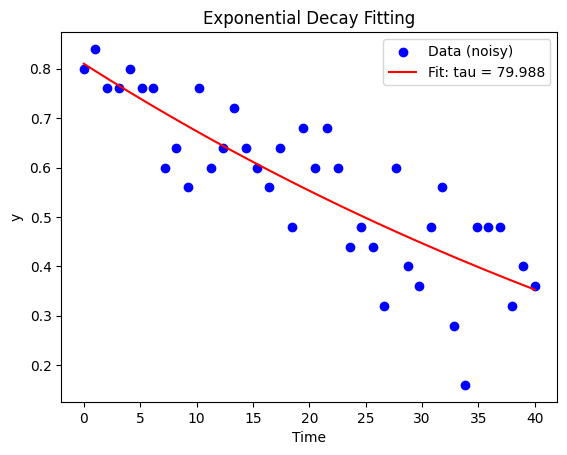

np.float64(79.98801681397872)

In [31]:
fit_exponential_decay(rabi_t, pmt_count)